## Memory Savings in Rippled 1.7

Rippled 1.7 contains two changes that results in significant memory savings:
* Storing SHAMap inner nodes in a sparse format
* Removing the database's caches

This notebook shows resulting memory savings.The data was collected by sampling the resident set size every 30 seconds for one day. The resident set size was obtained from `/proc/<pid>/statm`.

Note the first half-hour of the data is not plotted (memory savings is less significant on startup).

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("b5_b7_b9_memstats.txt", sep=' ', index_col='time')
for b in [5, 7, 9]:
    df[f'gb_b{b}'] = df[f'pages_b{b}'] / (2**18)
df.reset_index(inplace=True)
init_time = df['time'][0]
df['time'] = (df['time']  - init_time) / 3600
df = df[df['time'] > 0.5]

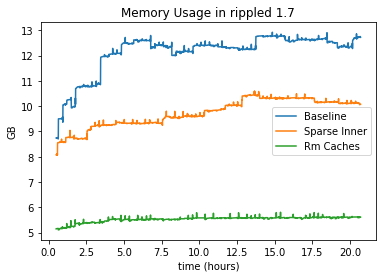

In [17]:
f = plt.figure()
plt.plot(df['time'], df['gb_b5'], label = "Baseline")
plt.plot(df['time'], df['gb_b7'], label = "Sparse Inner")
plt.plot(df['time'], df['gb_b9'], label = "Rm Caches")
plt.xlabel('time (hours)')
plt.ylabel('GB')
plt.title('Memory Usage in rippled 1.7')
plt.legend()
plt.show()
f.savefig('b7_memory_usage.png', bbox_inches='tight', dpi=600, transparent=False)

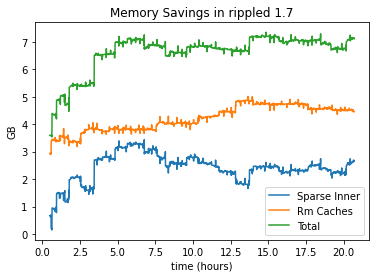

In [18]:
f = plt.figure()
plt.plot(df['time'], df['gb_b5'] - df['gb_b7'], label = "Sparse Inner")
plt.plot(df['time'], df['gb_b7'] - df['gb_b9'], label = "Rm Caches")
plt.plot(df['time'], df['gb_b5'] - df['gb_b9'], label = "Total")
plt.xlabel('time (hours)')
plt.ylabel('GB')
plt.title('Memory Savings in rippled 1.7')
plt.legend()
plt.show()
f.savefig('b7_memory_savings.png', bbox_inches='tight', dpi=600, transparent=False)